In [16]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')
data = pd.read_csv('finalData.csv')

X = data.drop(columns=['genre1', 'genre2', 'genre3'])
y = data[['genre1', 'genre2', 'genre3']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_imputed = imputer.fit_transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)

# Impute missing values in X_test using the same imputer
X_test_imputed = imputer.transform(X_test)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)

# Initialize a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Wrap the classifier in MultiOutputClassifier
multi_target_rf = MultiOutputClassifier(rf, n_jobs=-1)

# Train the model
multi_target_rf.fit(X_train_imputed, y_train)

# Evaluate the model
y_pred = multi_target_rf.predict(X_test_imputed)

for i in range(len(y_test.columns)):
    print(f"Classification Report for target variable {i + 1}:")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))

Classification Report for target variable 1:
              precision    recall  f1-score   support

          -1       0.26      0.27      0.26       847
           1       0.03      0.01      0.02        76
           2       0.14      0.12      0.13       274
           3       0.12      0.10      0.11       586
           4       0.85      0.77      0.81       470
           5       0.28      0.30      0.29      1284
           6       0.08      0.05      0.06       242
           7       0.23      0.15      0.18       615
           8       0.12      0.10      0.11       366
           9       0.46      0.54      0.50      4260
          10       0.20      0.20      0.20       689
          11       0.03      0.02      0.02       102
          12       0.43      0.43      0.43      1532
          13       0.00      0.00      0.00        57
          14       0.24      0.17      0.20       584
          15       0.08      0.08      0.08        63
          16       0.34      0.39   

/Users/fibu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fibu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fibu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

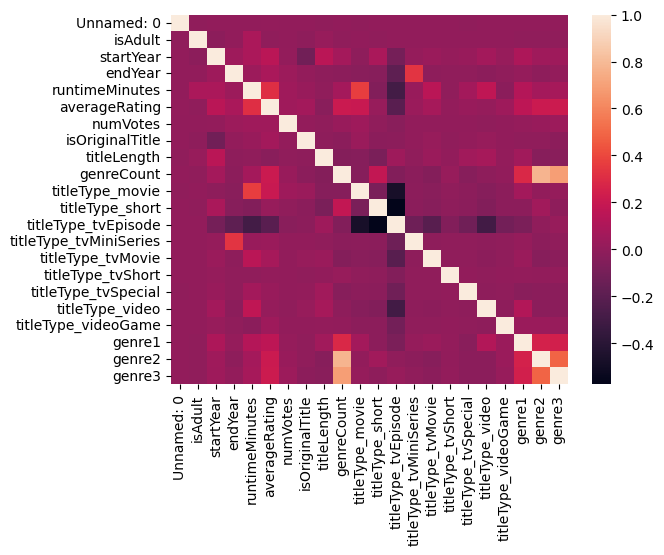

In [18]:
correlations = data.corr()

sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=False)